In [173]:
import pickle
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [174]:
# Controls appearance of seaborn plots. Options: paper, notebook, talk, or poster
SEABORN_CONTEXT = 'talk' 
SEABORN_PALETTE = sns.color_palette("bright")


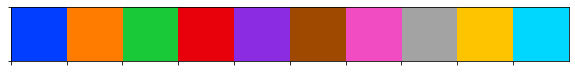

In [175]:
sns.palplot(SEABORN_PALETTE)

In [201]:
df = pd.read_csv('https://raw.githubusercontent.com/nytimes/covid-19-data/master/us-counties.csv')
df = df.loc[df['fips'].notnull()]
df['fips'] = df['fips'].astype(int)
df


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061,1,0
1,2020-01-22,Snohomish,Washington,53061,1,0
2,2020-01-23,Snohomish,Washington,53061,1,0
3,2020-01-24,Cook,Illinois,17031,1,0
4,2020-01-24,Snohomish,Washington,53061,1,0
...,...,...,...,...,...,...
19708,2020-03-29,Sheridan,Wyoming,56033,6,0
19709,2020-03-29,Sublette,Wyoming,56035,1,0
19710,2020-03-29,Sweetwater,Wyoming,56037,1,0
19711,2020-03-29,Teton,Wyoming,56039,14,0


In [202]:
df = df.loc[df['date'] == '2020-03-29'].sort_values('cases', ascending=False).head(60)
df

,date,county,state,fips,cases,deaths
18927,2020-03-29,Westchester,New York,36119,8519,10
18900,2020-03-29,Nassau,New York,36059,6445,39
18919,2020-03-29,Suffolk,New York,36103,5023,40
18165,2020-03-29,Cook,Illinois,17031,3445,40
18599,2020-03-29,Wayne,Michigan,26163,2704,56
18912,2020-03-29,Rockland,New York,36087,2209,8
18835,2020-03-29,Bergen,New Jersey,34003,2169,35
19610,2020-03-29,King,Washington,53033,2163,146
17869,2020-03-29,Los Angeles,California,6037,2136,37
17993,2020-03-29,Miami-Dade,Florida,12086,1471,3


In [207]:
# df_hospitals.loc[df_hospitals['fips'] == 'NOT AVAILABLE']

In [208]:
df_hospitals = pd.read_csv('us-hospitals.csv')
df_hospitals = df_hospitals.rename(columns={"COUNTYFIPS": "fips", "BEDS": "beds"})
df_hospitals = df_hospitals.loc[(df_hospitals.beds != -999) & (df_hospitals['fips'] != 'NOT AVAILABLE')]
df_hospitals['fips'] = df_hospitals['fips'].astype(int)
df_hospitals

,X,Y,OBJECTID,ID,NAME,ADDRESS,CITY,STATE,ZIP,ZIP4,...,VAL_DATE,WEBSITE,STATE_ID,ALT_NAME,ST_FIPS,OWNER,TTL_STAFF,beds,TRAUMA,HELIPAD
0,-83.387732,39.348667,3001,12645123,ADENA GREENFIELD MEDICAL CENTER,550 MIRABEAU STREET,GREENFIELD,OH,45123,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.adena.org/locations/detail.dT/adena...,1200,NOT AVAILABLE,39,NON-PROFIT,-999,25,NOT AVAILABLE,N
1,-81.919907,40.565095,3002,17244654,POMERENE HOSPITAL,981 WOOSTER ROAD,MILLERSBURG,OH,44654,NOT AVAILABLE,...,2014-01-31T00:00:00.000Z,http://www.pomerenehospital.org,1202,NOT AVAILABLE,39,GOVERNMENT - LOCAL,-999,69,NOT AVAILABLE,N
2,-82.450635,40.048302,3003,2543055,LICKING MEMORIAL HOSPITAL,1320 WEST MAIN STREET,NEWARK,OH,43055,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.lmhealth.org,1213,NOT AVAILABLE,39,NON-PROFIT,-999,213,NOT AVAILABLE,Y
3,-83.755531,40.369542,3004,5843311,MARY RUTAN HOSPITAL,205 PALMER AVENUE,BELLEFONTAINE,OH,43311,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.maryrutan.org,1214,NOT AVAILABLE,39,NON-PROFIT,-999,115,NOT AVAILABLE,N
4,-82.224713,41.295065,3005,5544074,MERCY ALLEN HOSPITAL,200 WEST LORAIN STREET,OBERLIN,OH,44074,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.mercyonline.org/mercy_allen_hospita...,1219,ALLEN COMMUNITY HOSPITAL,39,NON-PROFIT,-999,25,NOT AVAILABLE,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7570,-89.634245,44.931130,7571,6254403,NORTH CENTRAL HEALTH CARE,1100 LAKEVIEW DR,WAUSAU,WI,54403,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.norcen.org,206,NOT AVAILABLE,55,GOVERNMENT - LOCAL,-999,16,NOT AVAILABLE,N
7571,-87.954473,42.859866,7572,6653132,MIDWEST ORTHOPEDIC SPECIALTY HOSPITAL LLC,10101 SOUTH 27TH STREET,FRANKLIN,WI,53132,NOT AVAILABLE,...,2014-01-13T00:00:00.000Z,http://www.mymosh.com/,1070,NOT AVAILABLE,55,PROPRIETARY,-999,16,NOT AVAILABLE,N
7572,-117.566294,34.103714,7573,24091730,KINDRED HOSPITAL RANCHO,10841 WHITE OAK AVENUE,RANCHO CUCAMONGA,CA,91730,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,http://www.khrancho.com,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,55,NOT AVAILABLE,N
7573,-117.071712,32.617494,7574,34491911,PARADISE VALLEY HSP D/P APH BAYVIEW BEH HLTH,330 MOSS STREET,CHULA VISTA,CA,91911,NOT AVAILABLE,...,2014-02-10T00:00:00.000Z,NOT AVAILABLE,NOT AVAILABLE,NOT AVAILABLE,6,PROPRIETARY,-999,64,NOT AVAILABLE,N


In [211]:
df_hospitals.columns

Index(['X', 'Y', 'OBJECTID', 'ID', 'NAME', 'ADDRESS', 'CITY', 'STATE', 'ZIP',
       'ZIP4', 'TELEPHONE', 'TYPE', 'STATUS', 'POPULATION', 'COUNTY', 'fips',
       'COUNTRY', 'LATITUDE', 'LONGITUDE', 'NAICS_CODE', 'NAICS_DESC',
       'SOURCE', 'SOURCEDATE', 'VAL_METHOD', 'VAL_DATE', 'WEBSITE', 'STATE_ID',
       'ALT_NAME', 'ST_FIPS', 'OWNER', 'TTL_STAFF', 'beds', 'TRAUMA',
       'HELIPAD'],
      dtype='object')

In [212]:
beds_per_county = df_hospitals.groupby('fips', as_index=False)['beds'].sum().sort_values(by='beds', ascending=False)
beds_per_county_50 = beds_per_county.head(50)
beds_per_county

,fips,beds
158,6037,30371
474,17031,18259
2142,48201,15996
1506,36061,11052
291,12086,10243
...,...,...
1322,30071,6
1542,37015,6
1968,46077,6
890,22007,6


In [213]:
df_hospitals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6915 entries, 0 to 7574
Data columns (total 34 columns):
X             6915 non-null float64
Y             6915 non-null float64
OBJECTID      6915 non-null int64
ID            6915 non-null int64
NAME          6915 non-null object
ADDRESS       6915 non-null object
CITY          6915 non-null object
STATE         6915 non-null object
ZIP           6915 non-null int64
ZIP4          6915 non-null object
TELEPHONE     6915 non-null object
TYPE          6915 non-null object
STATUS        6915 non-null object
POPULATION    6915 non-null int64
COUNTY        6915 non-null object
fips          6915 non-null int64
COUNTRY       6915 non-null object
LATITUDE      6915 non-null float64
LONGITUDE     6915 non-null float64
NAICS_CODE    6915 non-null int64
NAICS_DESC    6915 non-null object
SOURCE        6915 non-null object
SOURCEDATE    6915 non-null object
VAL_METHOD    6915 non-null object
VAL_DATE      6915 non-null object
WEBSITE       6915 n

In [214]:
df_merged = df.merge(beds_per_county, how='left', on='fips').sort_values(by='cases', ascending=False)
df_merged_50 = df_merged.head(50)
df_merged_50

,date,county,state,fips,cases,deaths,beds
0,2020-03-29,Westchester,New York,36119,8519,10,3235
1,2020-03-29,Nassau,New York,36059,6445,39,4343
2,2020-03-29,Suffolk,New York,36103,5023,40,3583
3,2020-03-29,Cook,Illinois,17031,3445,40,18259
4,2020-03-29,Wayne,Michigan,26163,2704,56,6079
5,2020-03-29,Rockland,New York,36087,2209,8,1169
6,2020-03-29,Bergen,New Jersey,34003,2169,35,3019
7,2020-03-29,King,Washington,53033,2163,146,5461
8,2020-03-29,Los Angeles,California,6037,2136,37,30371
9,2020-03-29,Miami-Dade,Florida,12086,1471,3,10243


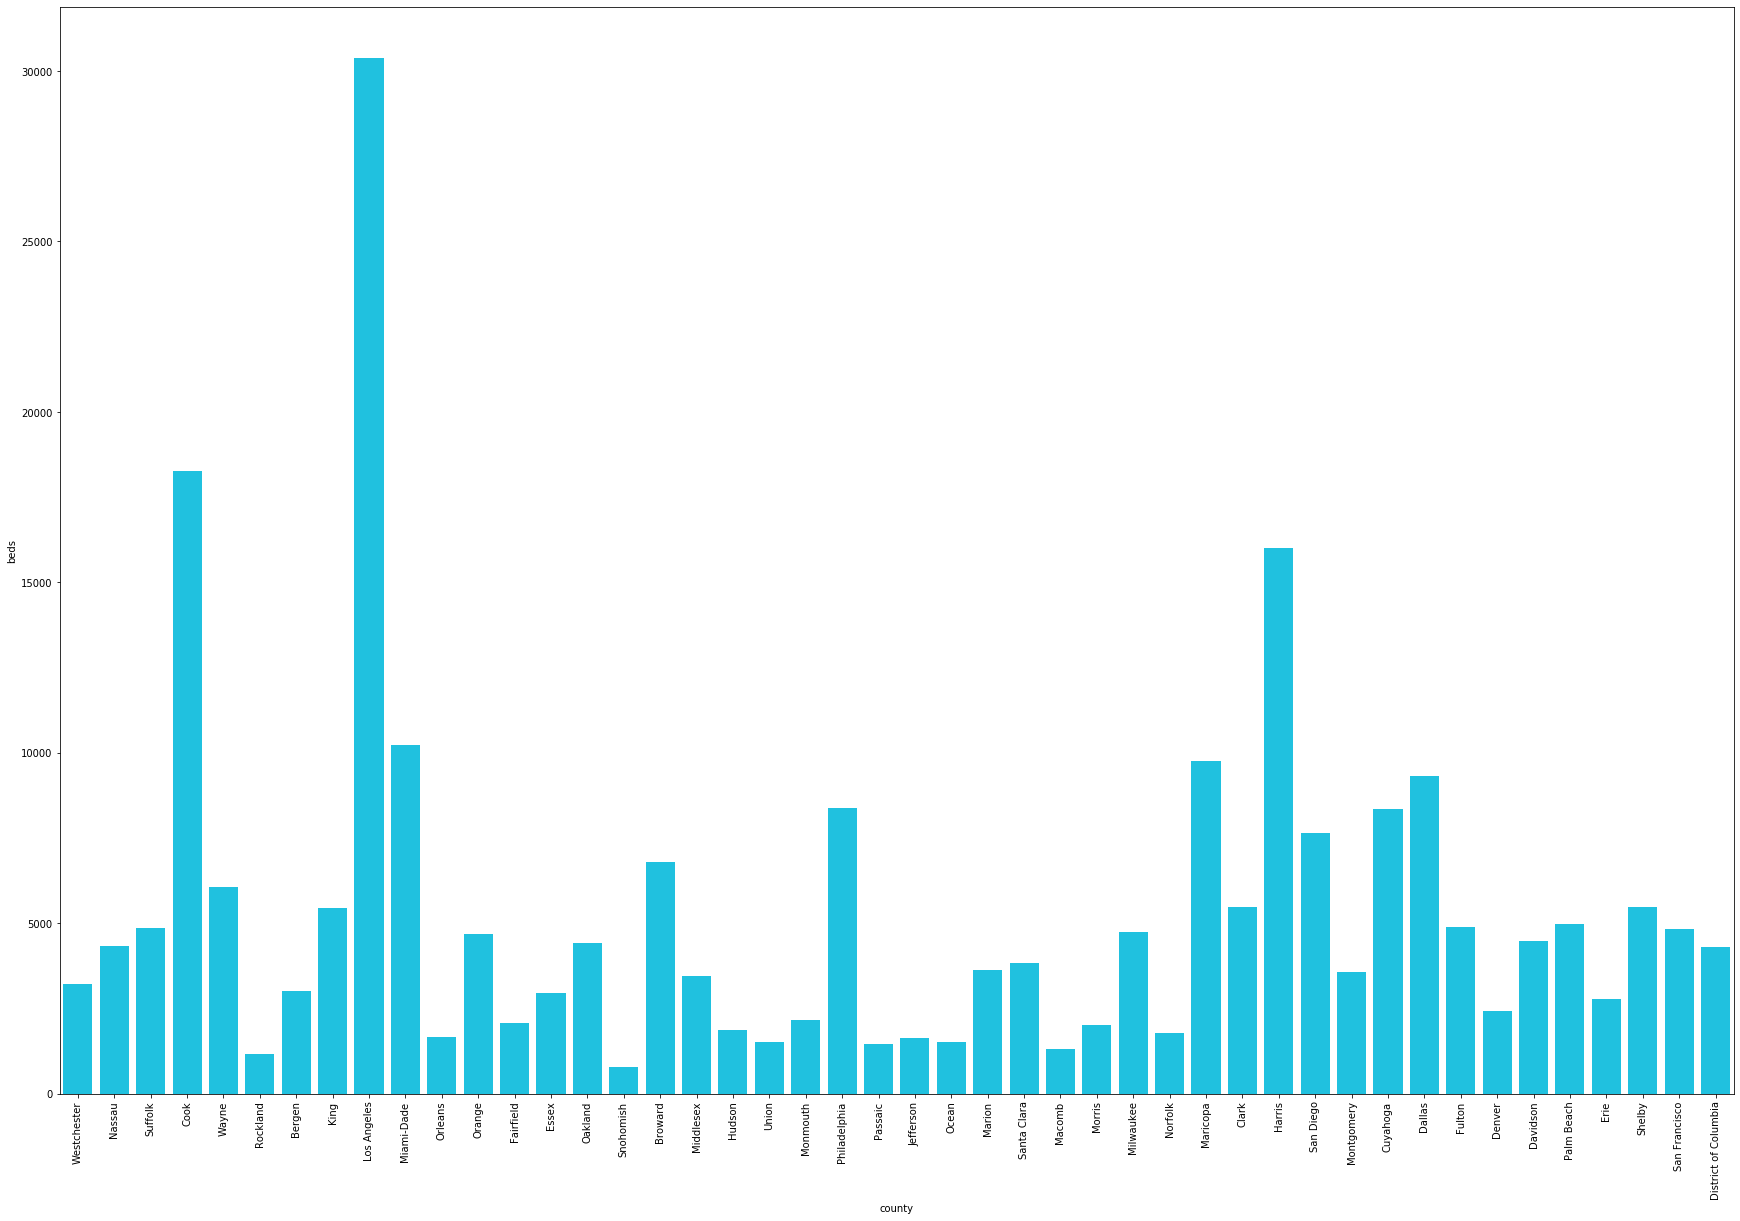

In [215]:
plt.figure(figsize=(30,20))
sns.barplot(x=df_merged_50['county'], y=df_merged_50['beds'], color=SEABORN_PALETTE[9], ci=False)
plt.xticks(rotation=90);